# Content

# Setting up the working directory

In [1]:
import os as os

In [2]:
os.chdir("C:\\Users\\Naveen Gandhi\\OneDrive\\Desktop\\Phython\\Datafiles\\Time series")

In [3]:
os.getcwd()

'C:\\Users\\kunal\\OneDrive\\Desktop\\Training 1\\Time series'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'AirPassengers.csv',
 'ARIMA_Air_Passengers.R',
 'Assignment 2 DSp 15.R',
 'Avg_Monthly_Cycle_Hiring_Count.csv',
 'dailysales.csv',
 'Forecasting and Predicting the Furniture Sales of  .ipynb',
 'Gold price Data.csv',
 'Gold_Price_prediction.R',
 'Gold_Price_trend',
 'multiTimeline.csv',
 'Problem Statement.docx',
 'SQL.ods',
 'Super Store.csv',
 'Time series DC.ipynb',
 'Time Series Forecasting (1).pptx',
 'Time series on Cycle Ridership Data.ipynb',
 'Time series using ExL.ods',
 'Time_Series_Air_Passengers_dataset.ipynb',
 'Time_series_astsa_Birth.R',
 'Time_Series_Wikipedia.R',
 'TSA_Furniture_Sales-Copy1 april 2021.ipynb',
 'TSA_Furniture_Sales.ipynb',
 'TSA_Furniture_Sales_Self_FNotes.ipynb',
 'TSA_Furniture_Sales_Shared_April_22_2022.ipynb',
 'US_Birth.csv']

# Installing/Importing the packages to be used

In [9]:
import warnings
import itertools
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#rom matplotlib import pyplot



In [10]:
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Reading the Times series data

In [11]:
#read the datset 
furniture = pd.read_csv("Super Store[Time series data.csv", encoding='cp1252')


furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [12]:

#Run the 1st 6 rows and all columns of the dataset
furniture.head(50)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [13]:
#Checking the simensionof the Time series data
furniture.shape

(2121, 21)

In [14]:
#Checking the str/character type variables

furniture.describe(include="O")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
unique,1764,889,960,4,707,707,3,1,371,48,4,375,1,4,380
top,US-2015-129007,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table
freq,4,10,10,1248,15,15,1113,2121,192,444,707,16,2121,957,18


In [15]:
#checking the numeric and continuous variables

furniture.describe(include="float64")

,Sales,Discount,Profit
count,2121.000000,2121.000000,2121.000000
mean,349.834887,0.173923,8.699327
std,503.179145,0.181547,136.049246
min,1.892000,0.000000,-1862.312400
25%,47.040000,0.000000,-12.849000
50%,182.220000,0.200000,7.774800
75%,435.168000,0.300000,33.726600
max,4416.174000,0.700000,1013.127000


In [16]:
#checking the numeric and integer variables 
furniture.describe(include="int64")

,Row ID,Postal Code,Quantity
count,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,3.785007
std,2885.740258,32261.888225,2.251620
min,1.000000,1040.000000,1.000000
25%,2568.000000,22801.000000,2.000000
50%,5145.000000,60505.000000,3.000000
75%,7534.000000,90032.000000,5.000000
max,9991.000000,99301.000000,14.000000


In [17]:
#Info command to have a glance on the datatypes and the missing values 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

# check the time stamp

In [18]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [19]:
furniture=furniture.loc[:,['Order Date','Sales']];furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


In [20]:
furniture.shape

(2121, 2)

In [21]:
furniture = furniture.sort_values('Order Date')
furniture.head(15) #doesnot work

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940
344,1/10/2015,1018.104
1465,1/10/2016,24.850
972,1/10/2016,79.920
150,1/11/2014,9.940
1814,1/11/2016,54.992


In [22]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index();furniture.head(15)

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940
5,1/11/2016,54.992
6,1/12/2017,37.680
7,1/13/2014,879.939
8,1/13/2015,542.450
9,1/13/2017,212.940


In [23]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  889 non-null    object 
 1   Sales       889 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [24]:
#using the pd.to_datetime we convert the order date format 

furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [25]:
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [26]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [27]:
furniture = furniture['Sales'].resample('MS').mean()   #MS stands for month start

In [28]:
furniture=pd.DataFrame(furniture)

In [29]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [30]:
furniture.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

In [31]:
furniture['2014':]

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [32]:
min(furniture.index)

Timestamp('2014-01-01 00:00:00', freq='MS')

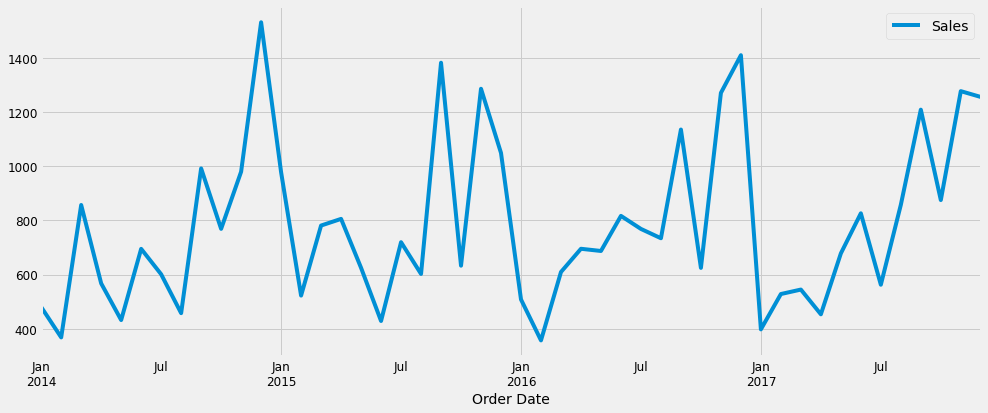

In [33]:
#visually checking the time series for trend and other componenets
furniture.plot(figsize=(15, 6))
plt.show()

In [34]:
#sns.lineplot(data=furniture)

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year

# Checking Stationarity
Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

In [35]:
#Performing the Dickey Fuller test


from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(furniture)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
       print(key, value)

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
1% -3.6209175221605827
5% -2.9435394610388332
10% -2.6104002410518627


This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

# Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

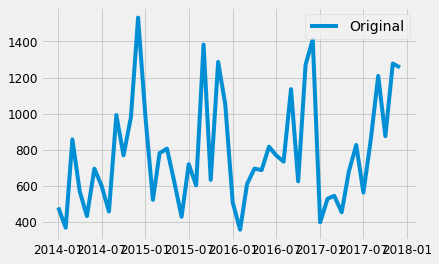

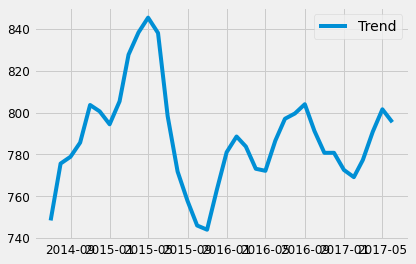

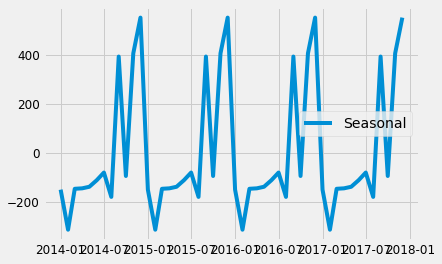

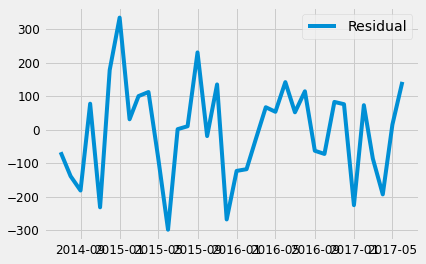

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(furniture)
plt.plot(furniture, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [37]:
#splitting the dataset into training and testing
furniture.shape

(48, 1)

In [38]:
train=furniture.iloc[:36];train.head(12)

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [39]:
train.tail(12)

,Sales
Order Date,
2016-01-01,508.182867
2016-02-01,356.868273
2016-03-01,609.575810
2016-04-01,695.373158
2016-05-01,687.265227
2016-06-01,816.910750
2016-07-01,768.736412
2016-08-01,734.307782
2016-09-01,1135.953371


In [40]:
test=furniture.iloc[36:];test

,Sales
Order Date,
2017-01-01,397.602133
2017-02-01,528.179800
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583


In [41]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing

In [42]:
Sin_ES=SimpleExpSmoothing(train).fit(smoothing_level=0.01);Sin_ES.summary()

Dep. Variable:,Sales,No. Observations:,36
Model:,SimpleExpSmoothing,SSE,3350220.680
Optimized:,True,AIC,415.877
Trend:,None,BIC,419.044
Seasonal:,None,AICC,417.167
Seasonal Periods:,None,Date:,"Sat, 15 Oct 2022"
Box-Cox:,False,Time:,17:24:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0100000,alpha,False
initial_level,780.69338,l.0,True


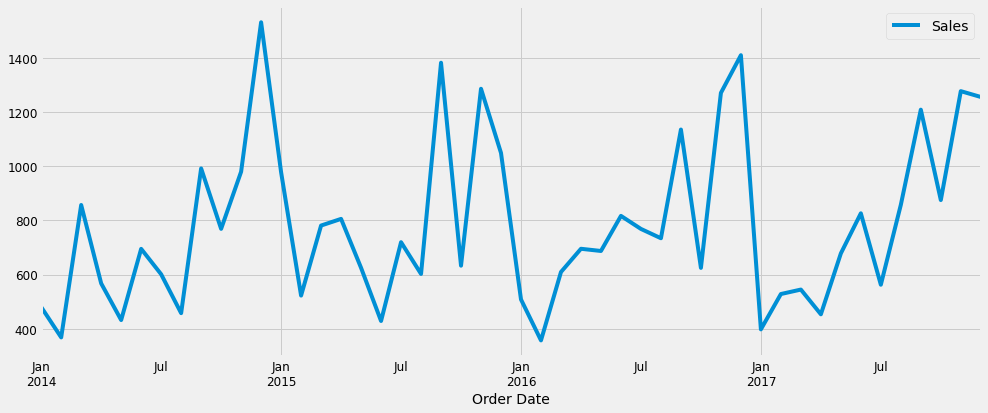

In [43]:
furniture.plot(figsize=(15, 6))
plt.show()

In [44]:
Forecast_One_Yr=Sin_ES.forecast(12)#.rename('Forecast');
Forecast_One_Yr

2017-01-01    784.197375
2017-02-01    784.197375
2017-03-01    784.197375
2017-04-01    784.197375
2017-05-01    784.197375
2017-06-01    784.197375
2017-07-01    784.197375
2017-08-01    784.197375
2017-09-01    784.197375
2017-10-01    784.197375
2017-11-01    784.197375
2017-12-01    784.197375
Freq: MS, dtype: float64

In [45]:
furniture['Forecast']=Forecast_One_Yr;furniture.tail(12)

,Sales,Forecast
Order Date,,
2017-01-01,397.602133,784.197375
2017-02-01,528.179800,784.197375
2017-03-01,544.672240,784.197375
2017-04-01,453.297905,784.197375
2017-05-01,678.302328,784.197375
2017-06-01,826.460291,784.197375
2017-07-01,562.524857,784.197375
2017-08-01,857.881889,784.197375
2017-09-01,1209.508583,784.197375


In [46]:
furniture['Error']=(abs(furniture['Sales']-furniture['Forecast'])/furniture['Sales'])*100

In [47]:
#Absolute error
furniture['Error'][-12:]

Order Date
2017-01-01    97.231682
2017-02-01    48.471671
2017-03-01    43.976013
2017-04-01    72.998235
2017-05-01    15.611777
2017-06-01     5.113726
2017-07-01    39.406706
2017-08-01     8.589121
2017-09-01    35.163968
2017-10-01    10.414580
2017-11-01    38.629952
2017-12-01    37.578747
Freq: MS, Name: Error, dtype: float64

In [48]:
np.mean(furniture['Error']) #Average error --- MAPE   bounded 0 to 100

37.76551480698748

In [49]:
np.sqrt(np.mean((furniture['Sales']-furniture['Forecast'])**2)) #Root mean squared error  unbounded

303.4766767924757

In [50]:
#Double Exponential Smoothing

Dbl_Es=Holt(train).fit(smoothing_level=0.01,smoothing_trend=0.6)


Dbl_Es.summary()

Dep. Variable:,Sales,No. Observations:,36
Model:,Holt,SSE,3172630.954
Optimized:,True,AIC,417.916
Trend:,Additive,BIC,424.250
Seasonal:,None,AICC,420.812
Seasonal Periods:,None,Date:,"Sat, 15 Oct 2022"
Box-Cox:,False,Time:,17:24:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0100000,alpha,False
smoothing_trend,0.6000000,beta,False


In [51]:
furniture['Forecast_Dbl_Es']=Dbl_Es.forecast(12)

In [52]:
Dbl_Es.forecast(12)

2017-01-01    913.154715
2017-02-01    920.728337
2017-03-01    928.301959
2017-04-01    935.875581
2017-05-01    943.449203
2017-06-01    951.022825
2017-07-01    958.596447
2017-08-01    966.170068
2017-09-01    973.743690
2017-10-01    981.317312
2017-11-01    988.890934
2017-12-01    996.464556
Freq: MS, dtype: float64

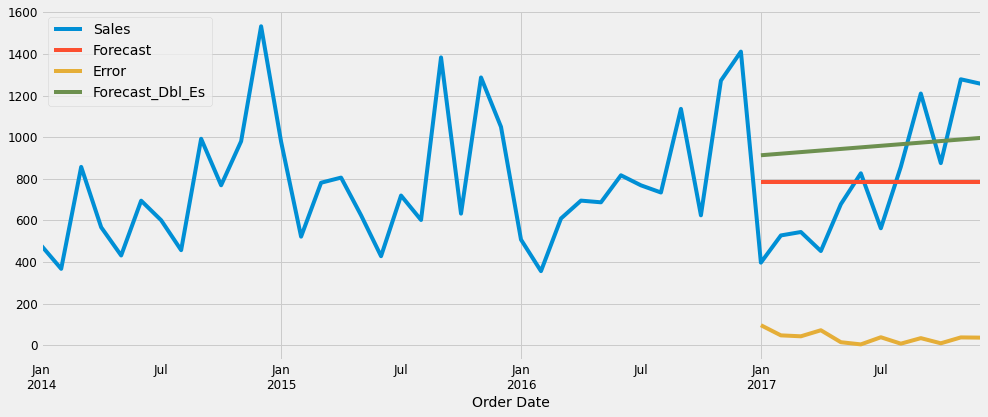

In [53]:
furniture.plot(figsize=(15, 6))
plt.show()

In [54]:
furniture['dbl_Es_Error']=(abs(furniture['Sales']-furniture['Forecast_Dbl_Es'])/
                           furniture['Sales'])*100

In [55]:
furniture['dbl_Es_Error'][-12:]

Order Date
2017-01-01    129.665447
2017-02-01     74.321005
2017-03-01     70.433132
2017-04-01    106.459278
2017-05-01     39.089778
2017-06-01     15.071811
2017-07-01     70.409616
2017-08-01     12.622738
2017-09-01     19.492618
2017-10-01     12.104078
2017-11-01     22.610957
2017-12-01     20.682511
Freq: MS, Name: dbl_Es_Error, dtype: float64

In [56]:
np.mean(furniture['dbl_Es_Error']) #Average error --- MAPE   bounded 0 to 100

49.413580724032535

In [57]:
np.sqrt(np.mean((furniture['Sales']-furniture['Forecast_Dbl_Es'])**2)) #Root mean squared error  unbounded

325.59732970976637

In [58]:
Tpl_Es=ExponentialSmoothing(train,seasonal_periods=12,seasonal='add',trend='add').fit(
smoothing_level=0.01,smoothing_trend=0.1,smoothing_seasonal=0.3)

In [59]:
Tpl_Es.summary()

Dep. Variable:,Sales,No. Observations:,36
Model:,ExponentialSmoothing,SSE,883780.541
Optimized:,True,AIC,395.904
Trend:,Additive,BIC,421.240
Seasonal:,Additive,AICC,436.139
Seasonal Periods:,12,Date:,"Sat, 15 Oct 2022"
Box-Cox:,False,Time:,17:24:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0100000,alpha,False
smoothing_trend,0.1000000,beta,False


In [65]:
furniture['Forecast_Tpl_Es']=Tpl_Es.forecast(12)

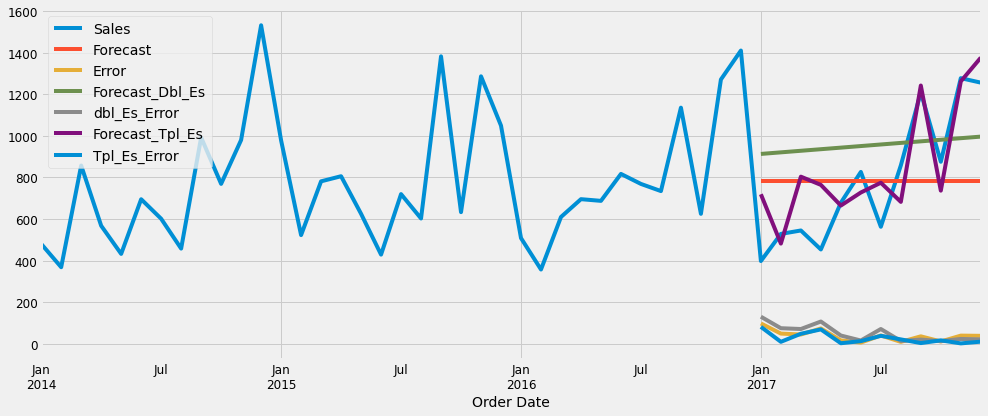

In [66]:
furniture.plot(figsize=(15, 6))
plt.show()

In [67]:
furniture['Tpl_Es_Error']=(abs(furniture['Sales']-furniture['Forecast_Tpl_Es'])/furniture['Sales'])*100

In [68]:
furniture['Tpl_Es_Error'][-12:]

Order Date
2017-01-01    80.832680
2017-02-01     8.820286
2017-03-01    47.552718
2017-04-01    68.571304
2017-05-01     2.020480
2017-06-01    11.978207
2017-07-01    37.693791
2017-08-01    20.455435
2017-09-01     2.713778
2017-10-01    15.863897
2017-11-01     1.218912
2017-12-01     9.574265
Freq: MS, Name: Tpl_Es_Error, dtype: float64

In [69]:
np.mean(furniture['Tpl_Es_Error']) #Average error --- MAPE   bounded 0 to 100

25.607979355760463

In [70]:
np.sqrt(np.mean((furniture['Sales']-furniture['Forecast_Tpl_Es'])**2)) #Root mean squared error  unbounded

180.27248020749795

In [ ]:
#Here start frm 0 go till 1 and here .2 represnets add .2 after evry number starting from 0 till it reaches 1
Alpa=np.round(np.arange(0,1.1,.2),2);
Alpa

In [71]:
Alpha=np.round(np.arange(0,1.1,.2),2)
Beeta=np.round(np.arange(0,1.1,.2),2)
Gamma=np.round(np.arange(0,1.1,.2),2)

alphaList=[]
betaList=[]
gammaList=[]
mapeList=[]

for alpha in Alpha:
    for beta in Beeta:
        for gamma in Gamma:
            
            print(alpha,beta,gamma)
            
            TES=ExponentialSmoothing(train,seasonal_periods=12,seasonal='add',
                                    trend='add').fit(smoothing_level=alpha,
                                                    smoothing_trend=beta,
                                                    smoothing_seasonal=gamma)
            
            Forecast=TES.forecast(12).rename('Forecast')
            Actual_Forecast_Df=pd.concat([test,Forecast],axis=1)
            Validation_Df=Actual_Forecast_Df[-12:].copy()
            tempMAPE=np.mean(abs(Validation_Df['Sales']-Validation_Df['Forecast'])/Validation_Df['Sales'])*100
            
            alphaList.append(alpha)
            betaList.append(beta)
            gammaList.append(gamma)
            mapeList.append(tempMAPE)
            
            model_selection_Df=pd.DataFrame({"alpha":alphaList,
                         "beta":betaList,
                         "gamma":gammaList,
                         "MAPE":mapeList})
    

0.0 0.0 0.0
0.0 0.0 0.2
0.0 0.0 0.4
0.0 0.0 0.6
0.0 0.0 0.8
0.0 0.0 1.0
0.0 0.2 0.0
0.0 0.2 0.2
0.0 0.2 0.4
0.0 0.2 0.6
0.0 0.2 0.8
0.0 0.2 1.0
0.0 0.4 0.0
0.0 0.4 0.2
0.0 0.4 0.4
0.0 0.4 0.6
0.0 0.4 0.8
0.0 0.4 1.0
0.0 0.6 0.0
0.0 0.6 0.2
0.0 0.6 0.4
0.0 0.6 0.6
0.0 0.6 0.8
0.0 0.6 1.0
0.0 0.8 0.0
0.0 0.8 0.2
0.0 0.8 0.4
0.0 0.8 0.6
0.0 0.8 0.8
0.0 0.8 1.0
0.0 1.0 0.0
0.0 1.0 0.2
0.0 1.0 0.4
0.0 1.0 0.6
0.0 1.0 0.8
0.0 1.0 1.0
0.2 0.0 0.0
0.2 0.0 0.2
0.2 0.0 0.4
0.2 0.0 0.6
0.2 0.0 0.8
0.2 0.0 1.0
0.2 0.2 0.0
0.2 0.2 0.2
0.2 0.2 0.4
0.2 0.2 0.6
0.2 0.2 0.8
0.2 0.2 1.0
0.2 0.4 0.0
0.2 0.4 0.2
0.2 0.4 0.4
0.2 0.4 0.6
0.2 0.4 0.8
0.2 0.4 1.0
0.2 0.6 0.0
0.2 0.6 0.2
0.2 0.6 0.4
0.2 0.6 0.6
0.2 0.6 0.8
0.2 0.6 1.0
0.2 0.8 0.0
0.2 0.8 0.2
0.2 0.8 0.4
0.2 0.8 0.6
0.2 0.8 0.8
0.2 0.8 1.0
0.2 1.0 0.0
0.2 1.0 0.2
0.2 1.0 0.4
0.2 1.0 0.6
0.2 1.0 0.8
0.2 1.0 1.0
0.4 0.0 0.0
0.4 0.0 0.2
0.4 0.0 0.4
0.4 0.0 0.6
0.4 0.0 0.8
0.4 0.0 1.0
0.4 0.2 0.0
0.4 0.2 0.2
0.4 0.2 0.4
0.4 0.2 0.6
0.4 0.2 0.8
0.4 

In [66]:
model_selection_Df

,alpha,beta,gamma,MAPE
0,0.0,0.0,0.0,26.344771
1,0.0,0.0,0.2,26.029403
2,0.0,0.0,0.4,25.011125
3,0.0,0.0,0.6,23.644696
4,0.0,0.0,0.8,21.861595
...,...,...,...,...
211,1.0,1.0,0.2,176.472142
212,1.0,1.0,0.4,421.890068
213,1.0,1.0,0.6,355.897138
214,1.0,1.0,0.8,265.204883


In [1]:
model_selection_Df.MAPE.min()

NameError: name 'model_selection_Df' is not defined

In [2]:
model_selection_Df.loc[model_selection_Df['MAPE']==20.551518791417507]

NameError: name 'model_selection_Df' is not defined

In [69]:
Final_TES=ExponentialSmoothing(train,seasonal_periods=12,seasonal='add',trend='add').fit(smoothing_level=0.0,smoothing_trend=0.2,smoothing_seasonal=1.0)


Final_Forecast=Final_TES.forecast(12)

furniture['Final_Forecast']=Final_Forecast

In [70]:
furniture.columns

Index(['Sales', 'Forecast', 'Error', 'Forecast_Dbl_Es', 'dbl_Es_Error',
       'Forecast_Tpl_Es', 'Tpl_Es_Error', 'Final_Forecast'],
      dtype='object')

In [71]:
#furniture.drop(['Forecast', 'Error', 'Forecast_Dbl_Es', 'dbl_Es_Error','Forecast_Tpl_Es','Tpl_Es_Error'],axis=1,inplace=True)

furniture.iloc[-12:,]

,Sales,Forecast,Error,Forecast_Dbl_Es,dbl_Es_Error,Forecast_Tpl_Es,Tpl_Es_Error,Final_Forecast
Order Date,,,,,,,,
2017-01-01,397.602133,784.197375,97.231682,913.154715,129.665447,718.994593,80.832680,545.162671
2017-02-01,528.179800,784.197375,48.471671,920.728337,74.321005,481.592831,8.820286,393.848077
2017-03-01,544.672240,784.197375,43.976013,928.301959,70.433132,803.678694,47.552718,646.555614
2017-04-01,453.297905,784.197375,72.998235,935.875581,106.459278,764.130189,68.571304,732.352962
2017-05-01,678.302328,784.197375,15.611777,943.449203,39.089778,664.597367,2.020480,724.245032
2017-06-01,826.460291,784.197375,5.113726,951.022825,15.071811,727.465166,11.978207,853.890554
2017-07-01,562.524857,784.197375,39.406706,958.596447,70.409616,774.561801,37.693791,805.716216
2017-08-01,857.881889,784.197375,8.589121,966.170068,12.622738,682.398415,20.455435,771.287587
2017-09-01,1209.508583,784.197375,35.163968,973.743690,19.492618,1242.331963,2.713778,1172.933175


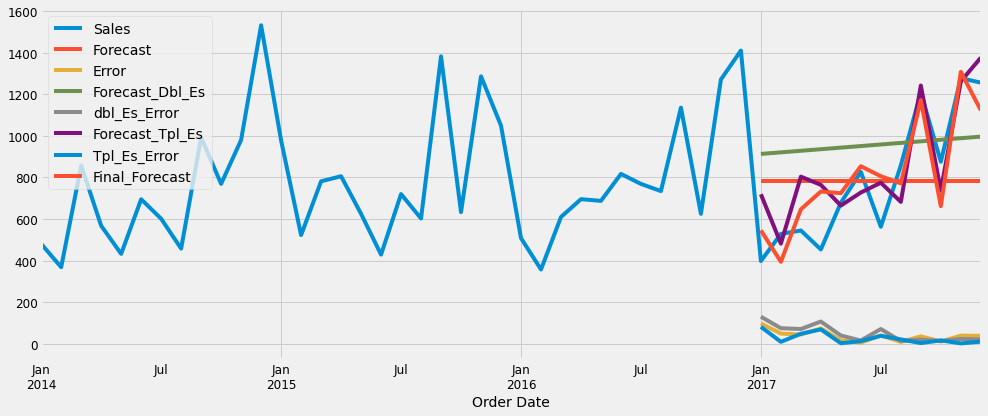

In [72]:
furniture.plot(figsize=(15, 6))
plt.show()

In [83]:
#Explanation of itertools

import itertools

p=range(0,7)
d=range(0,7)
q=range(0,7)

pdq_cominations=list(itertools.product(p,d,q))

pdq_cominations

#Similarly we will create seasonal pdq combinations and try hyperparameter tuning

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1,

In [82]:
p=np.arange(0.0,1.1,.2)
p

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [50]:
#Link for detailed explanation of Holts and winter model

#https://timeseriesreasoning.com/contents/holt-winters-exponential-smoothing/